### PART4 Test Part

#### 1.Load packages and data

In [8]:
#%% import packages
import pandas as pd 
import numpy as np
import sys, os

from tqdm import notebook 
from tqdm import tqdm
from tqdm import tqdm_notebook

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

ROOT = '../'
# from FeatureEngineering import FeatureEngineering
sys.path.append(os.path.join(ROOT, '03 feature selection'))
from naiveSelection import naiveSelection
from treeSelection import treeSelection
from SVCL1Selection import SVCL1Selection
from varianceThresholdSelection import varianceThresholdSelection
from pcaSelection import pcaSelection

sys.path.append(os.path.join(ROOT, '04 build classifier model'))
from MyDecisionTreeClassifier import MyDecisionTreeClassifier
from MyClassifier import *
from MySVMClassifier import MySVMClassifier
from MyXGBoostClassifier import MyXGBoostClassifier

# from MyDeepLearningClassifier import MyDeepLearningClassifier
from MyKNNClassifier import MyKNNClassifier
from sklearn.svm import SVC
import ffn

sys.path.append(os.path.join(ROOT, '05 rolling prediction'))
from RollingSignalGenerator import RollingSignalGenerator

In [9]:
ROOT = '../'
DATA_PATH = os.path.join(ROOT, '00 data')
CLEANED_FACTOR_PATH = os.path.join(ROOT, '02 data process')
rawDf = pd.read_pickle(os.path.join(CLEANED_FACTOR_PATH, 'cleanedFactor.pkl'))
INDEX_FACTOR_PATH = os.path.join(ROOT, '02 data process')
indexDf = pd.read_pickle(os.path.join(INDEX_FACTOR_PATH, 'newIndexFactor.pkl'))
rawDf = pd.merge(indexDf,rawDf,on = 'date',how='right')
# print(rawDf.head)
# rawDf = pd.concat([indexDf,rawDf],axis = 1)

#%% set object
sys.path.append(os.path.join(ROOT, '04 select feature and build model'))
sys.path.append(os.path.join(ROOT, '05 rolling prediction'))
from FeatureEngineering import FeatureEngineering
getFeatures = FeatureEngineering(DATA_PATH)
features = getFeatures.combine_feature()
rawDf = pd.merge(features,rawDf,on = 'date',how = 'right')
# rawDf = rawDf.iloc[58:,:]
rawXs, rawYs = rawDf.iloc[:, :-4], rawDf.iloc[:, -1]

#### 2.Have freedom to set object 
MIN_TRAIN_DAYS: 1400,1600,1800,etc.

TRAIN_MODE：Rolling or Extension

recordModels：True or False

sector: 
* naiveSelection
* pcaSelection
* SVCL1Selection
* treeSelection
* varianceThresholdSelection 

myPredictionModel:
* MyDecisionTreeClassifier
* MyKNNClassifier
* MySVMClassifier
* MyXGBoostClassifier
* MyDeepLearningClassifier
* MyClassifier

In [10]:
MIN_TRAIN_DAYS = 1800
TRAIN_MODE = 'extention'
recordModels = True

selector = naiveSelection
myPredictModel =  MyXGBoostClassifier

#### 3.General signals and predict

In [11]:
%%time
#%% get signal
sig = RollingSignalGenerator(rawXs, rawYs)
outputPrediction, models = sig.generateSignal(predictModel = myPredictModel, featureSelectionFunction = selector)

#%% outputPrediction
y_true = rawYs[outputPrediction.index]
print(metrics.precision_score(y_true, outputPrediction))

outputPredictionFileName = str(selector.__name__) + '_' +str(myPredictModel.__name__)
path = os.path.join(ROOT, '05 rolling prediction/outputResults/{}'.format(outputPredictionFileName))
if not os.path.isdir(path):
    os.makedirs(path)

outputPrediction.to_pickle(os.path.join(path,'{}_Value.pkl'.format(outputPredictionFileName)))
np.save(os.path.join(path,'{}_models'.format(outputPredictionFileName)), models)

start predict from 2008-04-01 00:00:00 to 2008-04-29 00:00:00
We only have 0 trainDataDays
start predict from 2008-04-29 00:00:00 to 2008-05-27 00:00:00
We only have 20 trainDataDays
start predict from 2008-05-27 00:00:00 to 2008-06-24 00:00:00
We only have 40 trainDataDays
start predict from 2008-06-24 00:00:00 to 2008-07-22 00:00:00
We only have 60 trainDataDays
start predict from 2008-07-22 00:00:00 to 2008-08-19 00:00:00
We only have 80 trainDataDays
start predict from 2008-08-19 00:00:00 to 2008-09-16 00:00:00
We only have 100 trainDataDays
start predict from 2008-09-16 00:00:00 to 2008-10-14 00:00:00
We only have 120 trainDataDays
start predict from 2008-10-14 00:00:00 to 2008-11-11 00:00:00
We only have 140 trainDataDays
start predict from 2008-11-11 00:00:00 to 2008-12-09 00:00:00
We only have 160 trainDataDays
start predict from 2008-12-09 00:00:00 to 2009-01-06 00:00:00
We only have 180 trainDataDays
start predict from 2009-01-06 00:00:00 to 2009-02-03 00:00:00
We only have 2

start predict from 2015-03-24 00:00:00 to 2015-04-21 00:00:00
train shape (X, y):(1695, 60)
test  shape (X, y):(20, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2015-10-06 00:00:00 to 2015-11-03 00:00:00
train shape (X, y):(1826, 60)
test  shape (X, y):(19, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2016-04-19 00:00:00 to 2016-05-17 00:00:00
train shape (X, y):(1958, 60)
test  shape (X, y):(20, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2016-11-01 00:00:00 to 2016-11-29 00:00:00
train shape (X, y):(2088, 60)
test  shape (X, y):(21, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2017-05-16 00:00:00 to 2017-06-13 00:00:00
train shape (X, y):(2219, 60)
test  shape (X, y):(19, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2017-11-28 00:00:00 to 2017-12-26 00:00:00
train shape (X, y):(2352, 60)
test  shape (X, y):(21, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2018-06-12 00:00:00 to 2018-07-10 00:00:00
train shape (X, y):(2482, 60)
test  shape (X, y):(20, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2018-12-25 00:00:00 to 2019-01-22 00:00:00
train shape (X, y):(2615, 60)
test  shape (X, y):(19, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2019-07-09 00:00:00 to 2019-08-06 00:00:00
train shape (X, y):(2743, 60)
test  shape (X, y):(21, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

start predict from 2020-01-21 00:00:00 to 2020-02-18 00:00:00
train shape (X, y):(2876, 60)
test  shape (X, y):(15, 60)
The total feature number is 60
The selected feature name is ['alpha002', 'alpha014', 'alpha018', 'alpha020', 'alpha034', 'alpha066', 'alpha070', 'alpha106', 'DJI_GI', 'IXIC_GI', 'SPX_GI', 'TY_CBT', 'hs300', 'IBO001', 'R007', 'B0', 'IBO001_pctChange5', 'R007_pctChange5', 'B0_pctChange5', 'SHIBORO/N', 'SHIBOR1W', 'SHIBOR2W', 'SHIBOR1M', 'SHIBOR3M', 'SHIBOR6M', 'SHIBORO/N_pctChange5', 'SHIBOR1W_pctChange5', 'SHIBOR2W_pctChange5', 'SHIBOR1M_pctChange5', 'SHIBOR3M_pctChange5', 'SHIBOR6M_pctChange5', '国债到期收益率:6个月', '国债到期收益率:1年', '国债到期收益率:2年', '国债到期收益率:6个月_pctChange5', '国债到期收益率:1年_pctChange5', '国债到期收益率:2年_pctChange5', '南华综合指数', 'CRB现货指数:综合', '期货收盘价(连续):COMEX黄金', '期货结算价(连续):布伦特原油', 'COMEX黄金/WTI原油', '南华综合指数_pctChange5', 'CRB现货指数:综合_pctChange5', '期货收盘价(连续):COMEX黄金_pctChange5', '期货结算价(连续):布伦特原油_pctChange5', 'COMEX黄金/WTI原油_pctChange5', '标普500', '日经225', '上证综指', '标普500_pctChange5'

#### 4.Use the result of prediction to calcuate daily return and cumprod return

In [14]:
#%% load windA
from load_data import load_data, plot_rts
windADf = load_data(DATA_PATH + '/881001.csv')
indexClose = windADf.loc[:, ['date', 'close']].set_index('date')
indexClose = indexClose[outputPrediction.index[0]:]

y_pred = pd.read_pickle(path + '/{}_Value.pkl'.format(outputPredictionFileName)).astype(bool)
y_indexClose = indexClose[y_pred.index[0]:]

windAReturn = indexClose.pct_change().shift(-1).rename(columns = {'close':'return'})
windACumprod = (windAReturn+1).cumprod()

longDay = y_pred.index[y_pred]
strategyLongReturn = windAReturn.loc[longDay]
strategyLongCumprod = (strategyLongReturn+1).cumprod()

shortDay = y_pred.index[~y_pred]
strategyLongShortReturn = windAReturn.loc[y_pred.index]
strategyLongShortReturn.loc[shortDay] = strategyLongShortReturn.loc[shortDay]*-1
strategyLongShortCumprod = (strategyLongShortReturn+1).cumprod()

In [15]:
#save result
Result = pd.DataFrame()
Result['windAReturn'] = windAReturn['return']    
Result['windACumprod'] = windACumprod['return']
Result = pd.merge(Result,strategyLongReturn['return'],
                  left_index = True,right_index = True,how='left')
Result = pd.merge(Result,strategyLongCumprod['return'],
                  left_index = True,right_index = True,how='left')
Result = pd.merge(Result,strategyLongShortReturn['return'],
                  left_index = True,right_index = True,how='left')
Result = pd.merge(Result,strategyLongShortCumprod['return'],
                  left_index = True,right_index = True,how='left')
Result = Result.fillna(method = 'ffill')
Result.columns = ['windAReturn','windACumprod',
                  'LongReturn','LongCumprod',
                  'LongShortReturn','LongShortCumprod']
Result.to_csv(path+'/{}_NAV.csv'.format(outputPredictionFileName))
# Result.plot()

#### 5.Plot buy and sell time

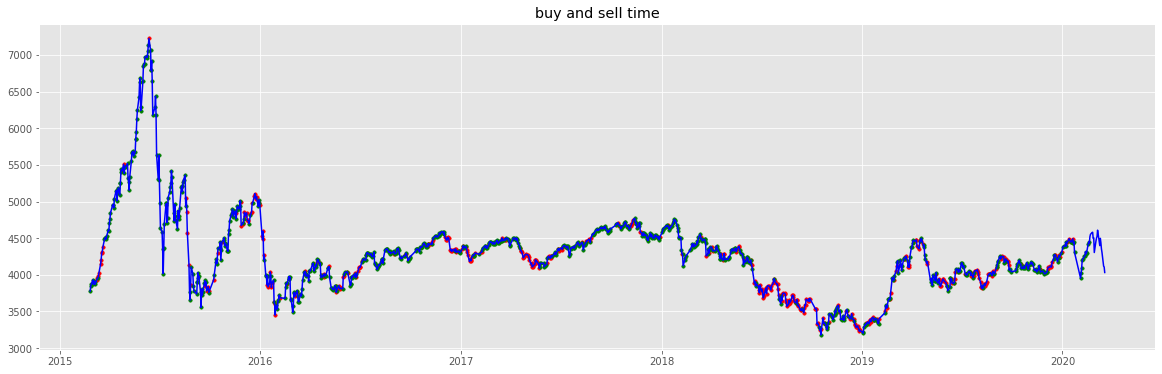

In [16]:
plt.figure(figsize = (20, 6))
# plt.style.use('dark_background') 
plt.plot(y_indexClose.index, y_indexClose,color = 'blue')
plt.scatter(shortDay, y_indexClose.loc[shortDay],color = 'red',s = 12)
plt.scatter(longDay, y_indexClose.loc[longDay],color = 'green',s = 12)
plt.title('buy and sell time')
plt.savefig(os.path.join(path,'{}.png'.format(outputPredictionFileName+'_buy_sell_time')))
plt.show()

#### 6. Plot pureLong and LongShort portfolio

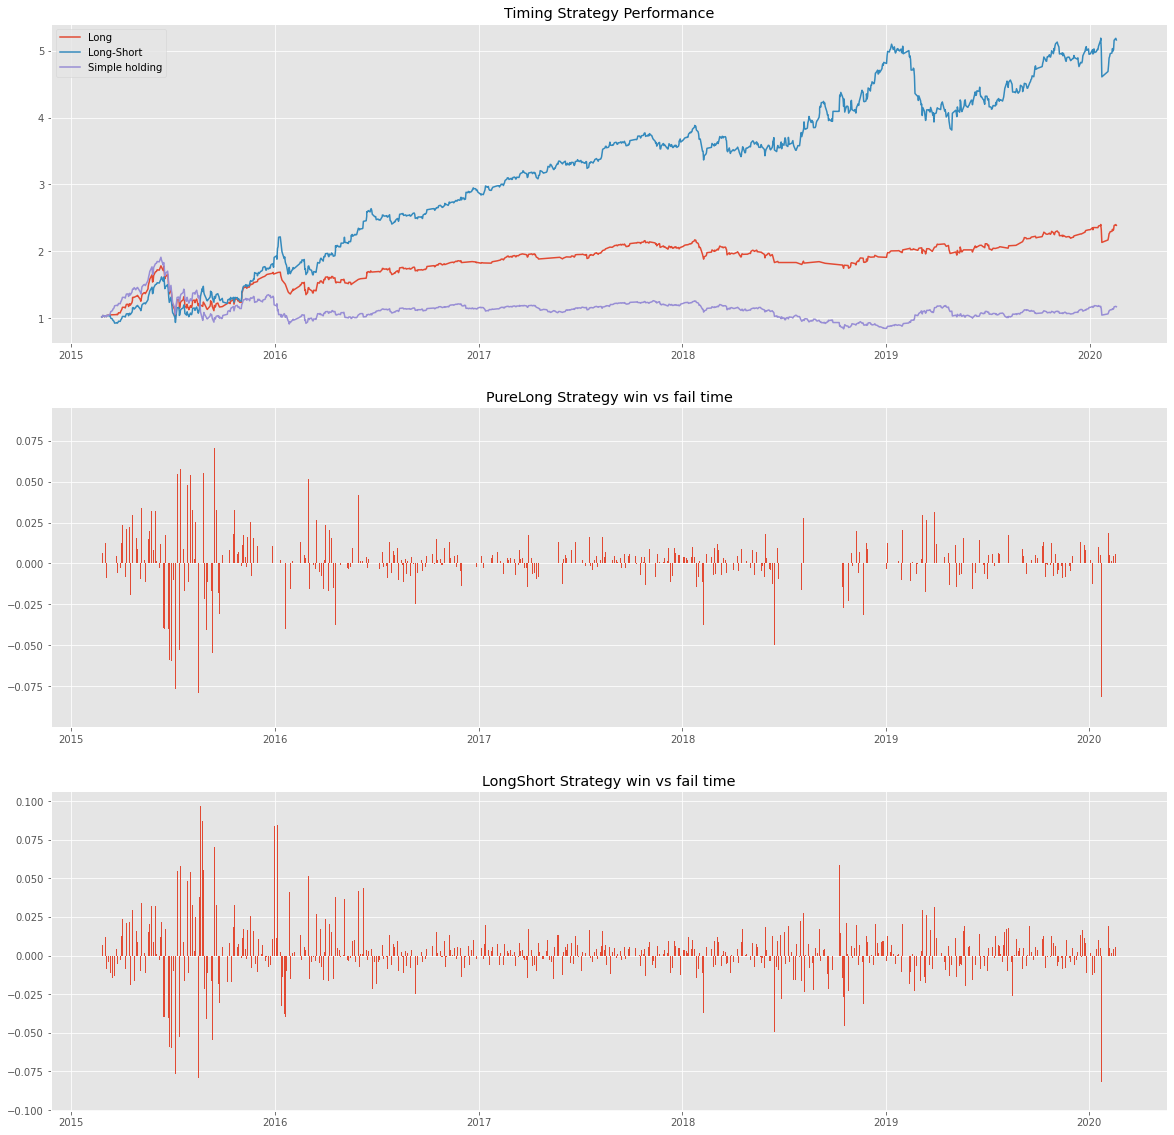

In [17]:
plt.figure(figsize = (20, 20))
plt.subplot(311)
plt.plot(strategyLongCumprod.index, strategyLongCumprod, label = 'Long')
plt.plot(strategyLongShortCumprod.index, strategyLongShortCumprod, label = 'Long-Short')
plt.plot(windACumprod.loc[y_pred.index].index, windACumprod.loc[y_pred.index], label = 'Simple holding')
plt.legend()
plt.title('Timing Strategy Performance')

plt.subplot(312)
plt.bar(strategyLongReturn.index, strategyLongReturn['return'])
plt.title('PureLong Strategy win vs fail time')

plt.subplot(313)
plt.bar(strategyLongShortReturn.index, strategyLongShortReturn['return'])
plt.title('LongShort Strategy win vs fail time')

plt.savefig(os.path.join(path,'{}.png'.format(outputPredictionFileName+'_performance')))
plt.show()

#### 7.Calcuate strategy's sharp ratio and Maxdrawdown

Stat                 windACumprod    LongCumprod    LongShortCumprod
-------------------  --------------  -------------  ------------------
Start                2015-02-25      2015-02-25     2015-02-25
End                  2020-03-18      2020-03-18     2020-03-18
Risk-free rate       0.00%           0.00%          0.00%

Total Return         4.83%           134.64%        406.83%
Daily Sharpe         0.18            0.82           1.25
Daily Sortino        0.26            1.21           2.06
CAGR                 0.94%           18.36%         37.82%
Max Drawdown         -55.99%         -42.06%        -42.06%
Calmar Ratio         0.02            0.44           0.90

MTD                  -9.59%          0.00%          0.00%
3m                   -5.65%          5.76%          7.13%
6m                   -4.19%          8.13%          12.92%
YTD                  -8.05%          2.90%          4.32%
1Y                   -4.50%          17.14%         25.40%
3Y (ann.)            -3.54%     

<Figure size 1440x432 with 0 Axes>

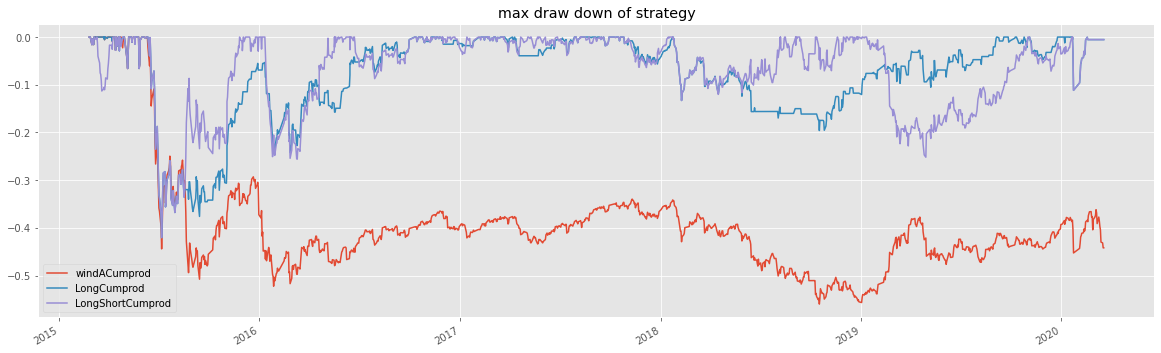

<Figure size 432x288 with 0 Axes>

In [18]:
prices  = Result.iloc[:,[1,3,5]]
# ax1 = prices.rebase().plot()
stats = prices.calc_stats()
# stats.plot()
stats.display()

plt.figure(figsize = (20, 6))
ax = stats.prices.to_drawdown_series().plot(figsize = (20,6))
plt.title('max draw down of strategy')
plt.show()
plt.savefig(os.path.join(path,'{}.png'.format(outputPredictionFileName+'_MDD')))

evaluationResults = pd.DataFrame()
evaluationResults['windACumprod'] = stats[0].stats
evaluationResults['LongCumprod'] = stats[1].stats
evaluationResults['LongShortCumprod'] = stats[2].stats
evaluationResults.to_csv(path+'/{}_EvaluationResults.csv'.format(outputPredictionFileName))

#### 8.Calculate and plot precision recall f1 

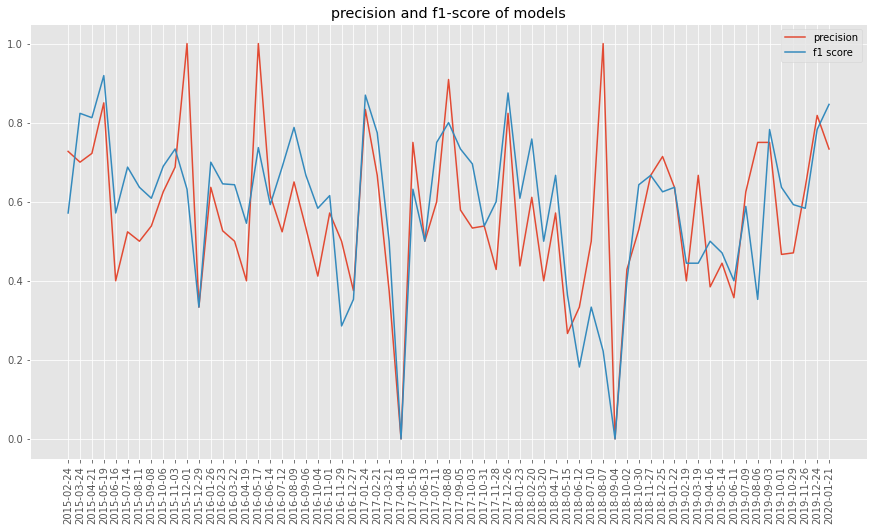

The mean precision score is 0.5690196222501533
The mean f1-score is 0.5870549507574234


In [19]:
ROOT = '../'
outputPredictionFileName = str(selector.__name__) + '_' +str(myPredictModel.__name__)
path = os.path.join(ROOT, '05 rolling prediction/outputResults/{}'.format(outputPredictionFileName))
models = np.load(os.path.join(path,'{}_models.npy'.format(outputPredictionFileName)), allow_pickle = True).item()

precision = []
recall = []
f1 = []
dateList = []

for k, v in models.items():
#   print(k)
#   print(v['performance'])
    dateList.append(k)
    precision.append(v['performance']['precision'])
    f1.append(v['performance']['f1_score'])

plt.figure(figsize = (15, 8))
plt.plot(dateList, precision, label = 'precision')
plt.plot(dateList, f1,label = 'f1 score')
plt.xticks(rotation = 90)
plt.title('precision and f1-score of models')
plt.legend()
plt.show()

print('The mean precision score is ' + str(np.mean(precision)))
print('The mean f1-score is ' + str(np.mean(f1)))        